KeyboardInterrupt: ignored

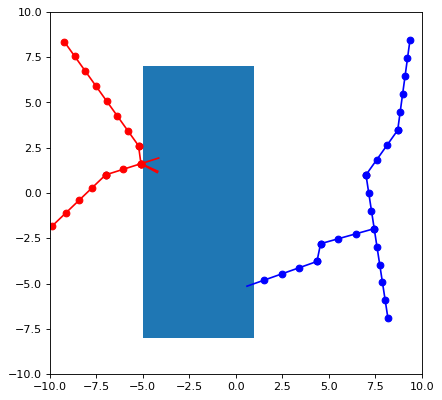

In [11]:
from matplotlib.pyplot import figure, clf, axis, plot, draw
from pylab import ion
from random import uniform
from time import sleep
from math import hypot, atan2, sin, cos, floor
import matplotlib.patches as patches


class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y



class RRT:
    def __init__(self, root, color):
        self.root = root
        self.step_size = 1
        self.config_list = []
        self.axis_size = 10
        self.add_tree(self.root)
        self.color = color

    def updatePlot(self):

        # Set axis
        axis([-self.axis_size,self.axis_size,-self.axis_size,self.axis_size])

        # Update the plot
        draw()

    def add_tree(self, tree):
        self.plot_config(tree)
        self.config_list.append(tree)

    def get_free_config(self):
        x = uniform(-self.axis_size, self.axis_size)
        y = uniform(-self.axis_size, self.axis_size)

        while -5 < x < 3 and -8 < y < 7:
            x = uniform(-self.axis_size, self.axis_size)
            y = uniform(-self.axis_size, self.axis_size)

        config = Point(x,y)
        return config

    def plot_config(self, config):
        plot(config.x, config.y,  'o')

    def dot_line(self, from_config, shortest_config):

        dots_num = floor(hypot(from_config.x-shortest_config.x, from_config.y-shortest_config.y)/self.step_size)
        angle = atan2(from_config.y-shortest_config.y, from_config.x-shortest_config.x )

        #from_line = shortest_config
        for dot in range( int( dots_num ) + 1 ):
            x = from_config.x - dot*self.step_size*cos(angle)
            y = from_config.y - dot*self.step_size*sin(angle)

            if -5 < x < 1 and -8 < y < 7:
                plot([x,from_config.x],[y,from_config.y],self.color +'-')
                return
            plot(x,y,self.color + 'o')
            config = Point(x,y)
            self.config_list.append(config)
            #from_line = Point(x,y)
        #self.plot_config(from_config)
        plot([x,from_config.x],[y,from_config.y],self.color + '-')
        self.config_list.append(from_config)


    def get_shortest_config(self, from_config):
        self.config_list.sort(key=lambda tmp: hypot(from_config.x - tmp.x,from_config.y - tmp.y), reverse=False)
        shortest_config = self.config_list[0]

        self.dot_line(shortest_config, from_config)

        #plot([shortest_config.x,from_config.x],[shortest_config.y,from_config.y],'-')

    def sample(self):
        free_config = self.get_free_config()

        self.get_shortest_config(free_config)

        self.updatePlot()


# init plot
fig = figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

fig.gca().add_patch(patches.Rectangle(
        (-5, -8),   # (x,y)
        6,          # width
        15,          # height
    )
)
ion()

rrt_start = RRT(Point(-7,1),'r')
rrt_goal = RRT(Point(7,1),'b')

for i in range(1000):
    rrt_start.sample()
    sleep(0.1)
    rrt_goal.sample()
    sleep(0.1)
sleep(100)